In [1]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import umap

In [2]:
sns.set(style='white', context='notebook', rc={'figure.figsize':(14,10)}) # set plot info

In [4]:
# load in data
dataset = 'exemplar-001'
cells = pd.read_csv(f'~/Harvard/mcmicro/{dataset}/cell-states/fastpg/unmicst-{dataset}-clean.csv', index_col='CellID')
cells.head()

,FDX1_cellMask,CD357_cellMask,CD1D_cellMask,CD163_cellMask,CD3D_cellMask,CD31_cellMask,LDH_cellMask,CD66B_cellMask,VDAC1_cellMask,ELANE_cellMask,...,CD16_cellMask,ECAD_cellMask,FOXP3_cellMask,NCAM_cellMask,CD4_cellMask,KERATIN_cellMask,CD14_cellMask,IBA1_cellMask,CD1B_cellMask,CD8A_cellMask
CellID,,,,,,,,,,,,,,,,,,,,,
1,1724.831325,929.746988,946.987952,3324.614458,2455.204819,1055.253012,2930.481928,359.096386,2354.072289,1114.108434,...,630.048193,1019.674699,395.626506,899.759036,2683.855422,213.746988,5939.253012,2573.216867,290.795181,739.795181
2,2694.066667,2377.851852,2119.903704,2713.503704,2077.362963,10671.718519,4902.718519,461.674074,3109.207407,1439.644444,...,426.651852,1143.800000,343.888889,919.414815,1867.259259,196.059259,4003.133333,3608.733333,321.392593,1912.022222
3,1114.301471,775.051471,715.117647,1168.941176,1190.963235,611.014706,1581.147059,275.477941,1258.573529,897.044118,...,314.198529,591.683824,156.867647,821.058824,513.750000,87.735294,495.852941,501.742647,168.213235,419.610294
4,1767.127273,1037.290909,895.672727,2193.018182,1314.709091,992.690909,2429.290909,423.127273,3880.690909,1290.872727,...,380.327273,1196.418182,344.072727,903.672727,810.109091,161.909091,1491.927273,996.381818,294.672727,996.563636
5,2331.388889,974.500000,938.074074,1744.305556,1302.129630,676.638889,13277.703704,391.851852,3070.120370,1584.009259,...,365.342593,2713.953704,279.055556,897.240741,809.277778,5531.722222,2019.027778,10191.101852,252.722222,1222.055556


In [5]:
reducer = umap.UMAP() # create UMAP object
data = cells[list(cells.columns)].values # get data we want to use
# scaled_data = StandardScaler().fit_transform(data) # convert data into z-scores (this might not be necessary)
# log transform the data
transformer = FunctionTransformer(np.log10, validate=True)
log_data = transformer.transform(data)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/preprocessing/_function_transformer.py:171: RuntimeWarning: divide by zero encountered in log10
  return func(X, **(kw_args if kw_args else {}))


In [6]:
embedding = reducer.fit_transform(log_data) # train the reducer, letting it learn about the manifold
embedding.shape

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [170]:
# special for exemplar-002 data
dataset = 'exemplar-001'
cells = pd.read_csv(f'~/Harvard/mcmicro/unmicst-exemplar-001-clean-logicle.csv', index_col='CellID')
reducer = umap.UMAP() # create UMAP object
data = cells[list(cells.columns)].values # get data we want to use
embedding = reducer.fit_transform(data) # train the reducer, letting it learn about the manifold
embedding.shape

(42117, 2)

In [171]:
# load in cluster assignment info
CELLID = 'CellID'
CLUSTER = 'Cluster'
fastPG = pd.read_csv(f'~/Harvard/mcmicro/{dataset}/cell-states/fastpg/unmicst-{dataset}-cells.csv', delimiter=',', index_col=CELLID)
scanpy = pd.read_csv(f'~/Harvard/mcmicro/{dataset}/cell-states/scanpy/unmicst-{dataset}-cells.csv', delimiter=',', index_col=CELLID)
flowSOM = pd.read_csv(f'~/Harvard/mcmicro/{dataset}/cell-states/flowsom/unmicst-{dataset}-cells.csv', delimiter=',', index_col=CELLID)

Text(0.5, 1.0, 'UMAP projection of the exemplar-002 dataset (logicle transformed) with scanpy clusters')

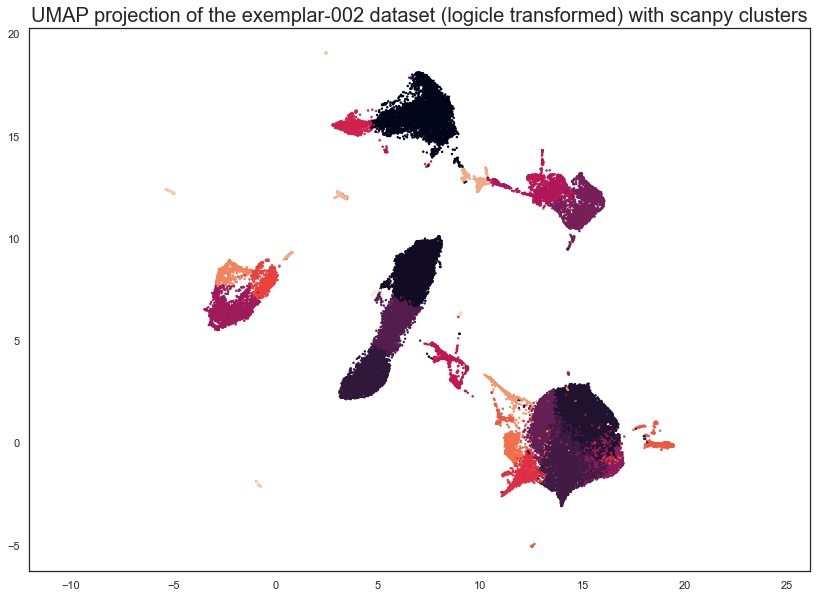

In [182]:
# plot UMAP
plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    s=2,
    c=[sns.color_palette('hls', flowSOM[CLUSTER].nunique() + 1)[x] for x in flowSOM[CLUSTER]])
plt.gca().set_aspect('equal', 'datalim')
plt.title(f'UMAP projection of the {dataset} dataset (logicle transformed) with scanpy clusters', fontsize=20)

In [165]:
flowSOM[CLUSTER].nunique()

25